**420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2021 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2021 Mikaël Swawola
<br/>
![Travaux Pratiques - Régularisation](static/13-tp-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la mise en oeuvre des régularisations de Tikhonov, Lasso et ElasticNet sur le jeu de données **Credit**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### 1 - Chargement et exploration sommaire des données

**Charger et visualiser le jeu de données Credit**

In [2]:
import pandas as pd

In [3]:
credit = pd.read_csv('../../data/Credit.csv', index_col=[0])

In [4]:
credit.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,903
3,104.593,7075,514,4,71,11,Male,No,No,580
4,148.924,9504,681,3,36,11,Female,No,No,964
5,55.882,4897,357,2,68,16,Male,No,Yes,331
6,80.180,8047,569,4,77,10,Male,No,No,1151
7,20.996,3388,259,2,37,12,Female,No,No,203
8,71.408,7114,512,2,87,9,Male,No,No,872
9,15.125,3300,266,5,66,13,Female,No,No,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,1350


In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

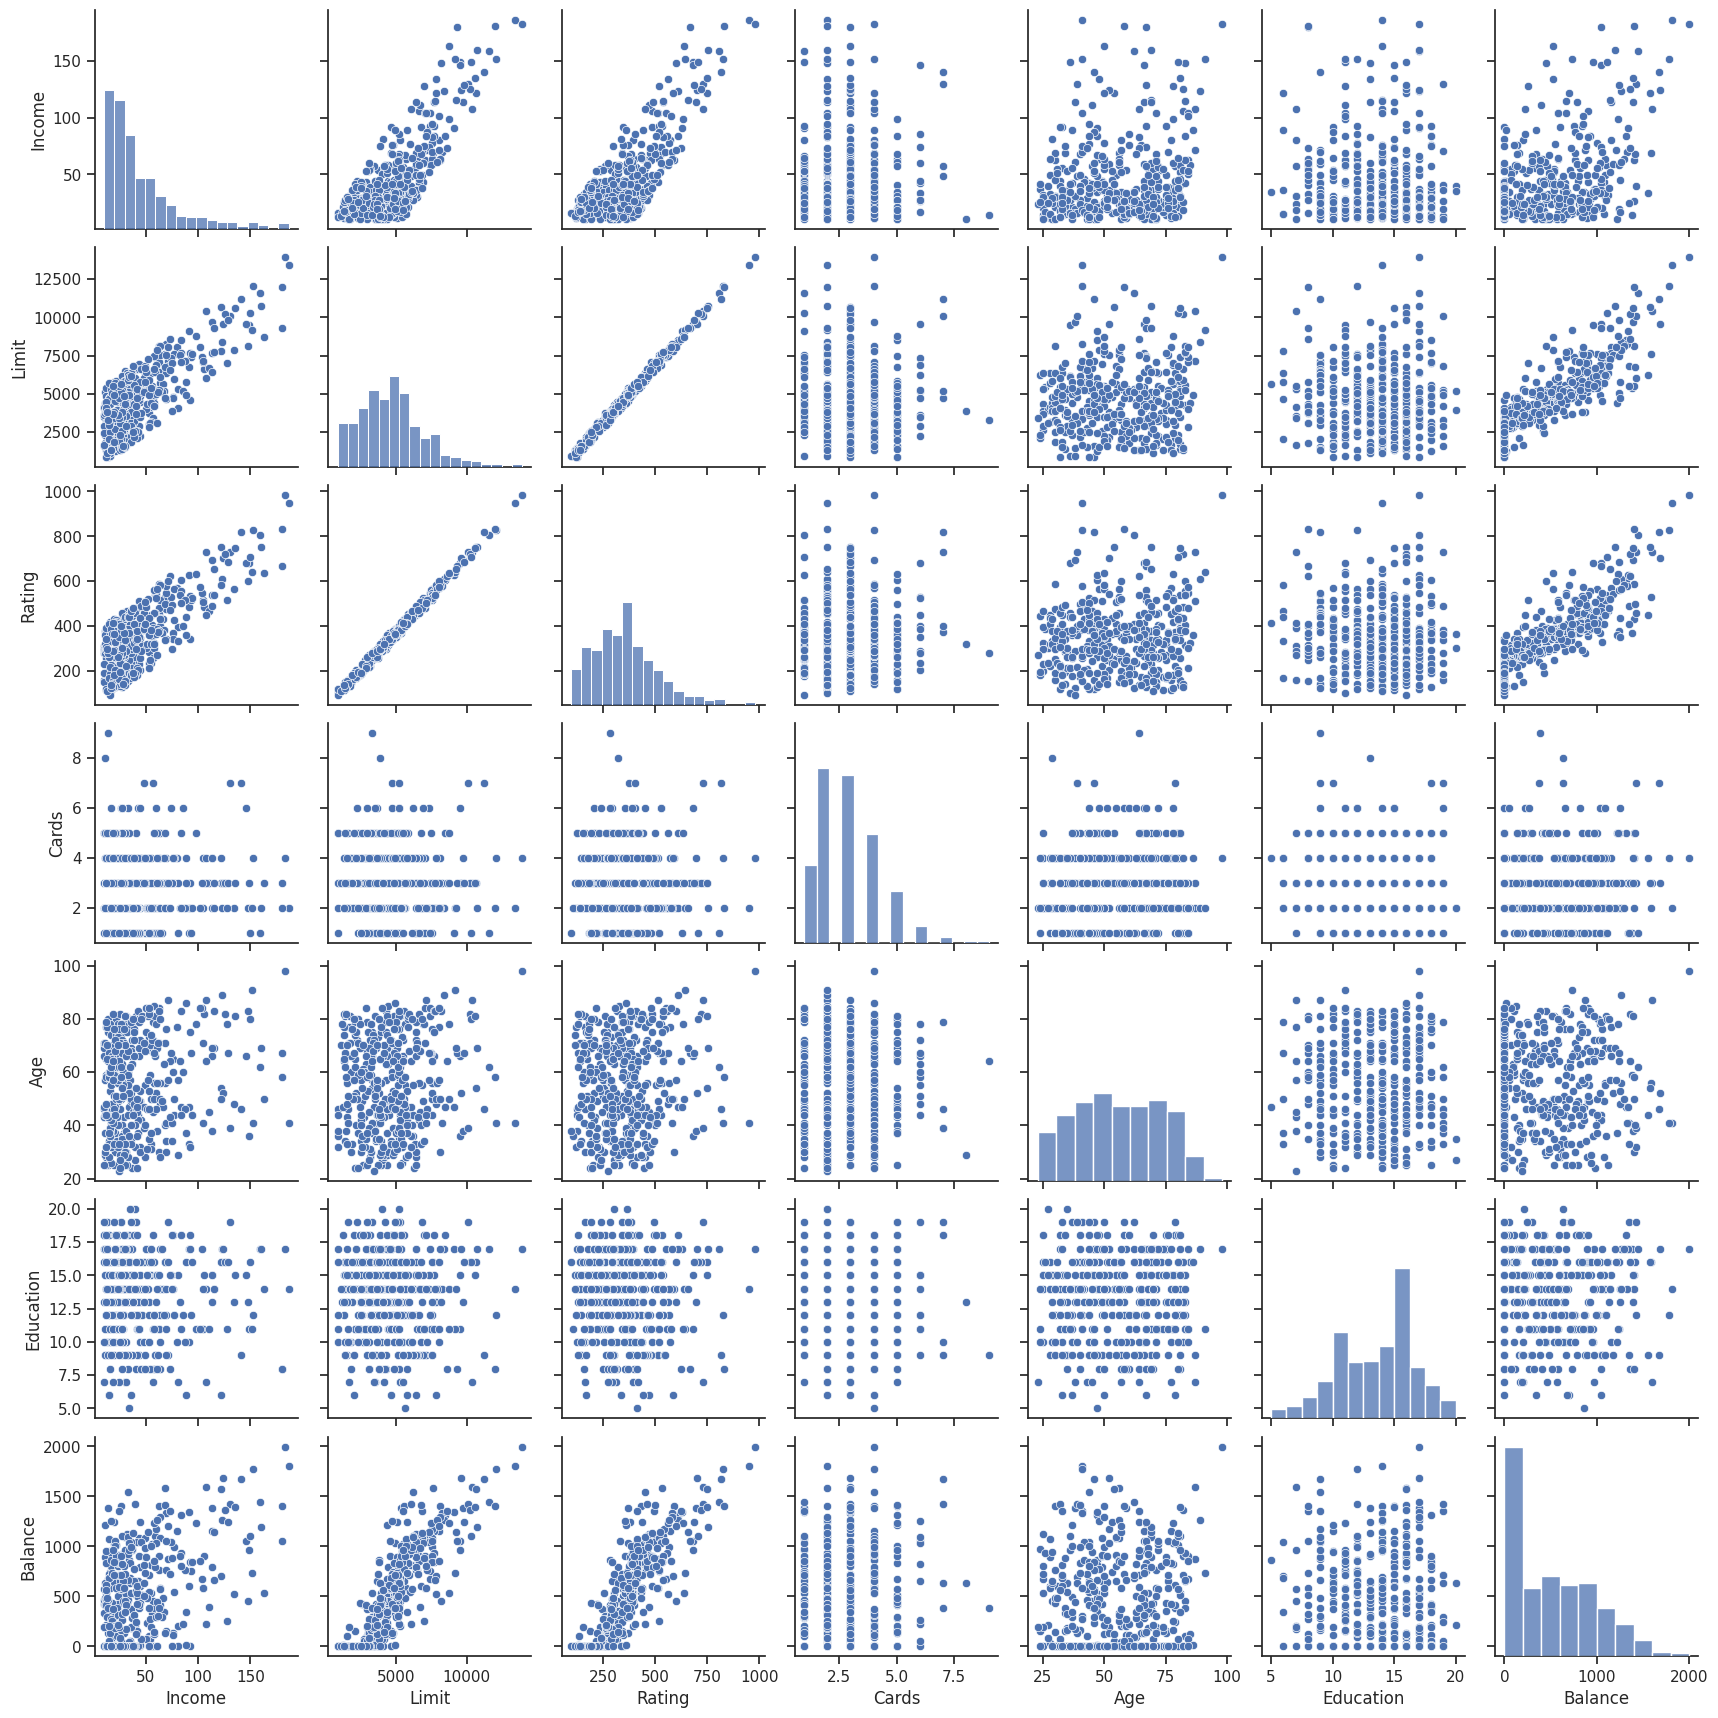

In [6]:
g_ = sns.pairplot(credit)

### 2 - Préparation des données

**Préparer le données afin de pouvoir les utiliser dans nos modèles**

In [7]:
credit['Gender'] = (credit['Gender'] == 'Female').astype(int)
credit['Student'] = (credit['Student'] == 'Yes').astype(int)
credit['Married'] = (credit['Married'] == 'Yes').astype(int)
#credit = credit.drop(columns=['Limit'])

In [8]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
1,14.891,3606,283,2,34,11,0,0,1,333
2,106.025,6645,483,3,82,15,1,1,1,903
3,104.593,7075,514,4,71,11,0,0,0,580
4,148.924,9504,681,3,36,11,1,0,0,964
5,55.882,4897,357,2,68,16,0,0,1,331


In [9]:
X = credit.values[:,:-1]
y = credit.values[:,-1]

In [10]:
X.shape

(400, 9)

In [11]:
y.shape

(400,)

In [12]:
import numpy as np
np.set_printoptions(suppress=True)

In [13]:
# Ici ne pas élever les variables indicatrices
X_poly = np.c_[X, X[:,:6]**2, X[:,:6]**3, X[:,:6]**4, X[:,:6]**5, X[:,:6]**6]
#X_poly = np.c_[X, X**2, X**3, X**4, X**5, X**6]

In [14]:
from sklearn import preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_poly)
X_scale = scaler.transform(X_poly)

In [16]:
X_scale.shape
X_scale

array([[-0.86158299, -0.48999879, -0.46553881, ..., -0.20524219,
        -0.7151699 , -0.78128661],
       [ 1.72743711,  0.82826106,  0.82870309, ..., -0.18476638,
         2.01364255,  0.05103391],
       [ 1.68675551,  1.01478681,  1.02931059, ..., -0.08109413,
         0.42661426, -0.78128661],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285, ...,  0.27389173,
         0.08700884, -0.67620475],
       [-0.21280808, -0.95891584, -1.05441888, ..., -0.20718201,
        -0.66364063, -0.51692143],
       [-0.75334493,  0.34199278,  0.38866085, ...,  0.27389173,
        -0.10911967, -0.92439668]])

### 3 - Séparation des données train / test

[ sklearn.model_selection.train_test_split(*arrays, **options)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**Garder 50% des données pour le test**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.20, shuffle=True, random_state=2022)

In [19]:
X_train.shape

(320, 39)

In [20]:
X_test.shape

(80, 39)

### 4 - Régression linéaire

[class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression().fit(X_train, y_train)

In [23]:
coef_reg = reg.coef_
coef_reg

array([  -326.76263273,   1089.3893878 ,   -724.36704569,    636.07976927,
         7535.42077983,  -2195.32572041,     -6.39524553,    127.47767811,
           -5.54522226,   1245.8666598 ,  -8275.04642335,   3952.64517112,
        -3410.33053058, -39001.03762646,  16108.64712834,  -6428.33152928,
        30498.08409461,  -7991.1452191 ,   8485.85360971,  83125.7859094 ,
       -46439.66464623,  13043.85091146, -50566.01852703,   7708.58966111,
       -11439.71723587, -90314.89757004,  65434.37760184, -11998.12775817,
        40747.4900461 ,  -3429.38014412,   8122.52523883,  49600.17058679,
       -45002.77046469,   4152.51242776, -13018.89280024,    607.44364782,
        -2362.36567723, -10954.67059058,  12091.57900522])

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
y_pred = reg.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

57.06501216302617

In [26]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

93.48149213296732

### 5 - Régularisation de Tikhonov - Ridge Regression

[class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [118]:
from sklearn.linear_model import RidgeCV

In [142]:
ridge = RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.06], cv=5).fit(X_train, y_train)
# ridge = RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.06], cv=5, scoring="neg_root_mean_squared_error").fit(X_train, y_train)

In [143]:
ridge.alpha_

0.02

In [144]:
coef_ridge = ridge.coef_
coef_ridge

array([-130.80661084,   -7.77510866, -111.43853408,   58.89270439,
       -117.33508636,  -24.68348573,   -5.32956425,  118.90931029,
         -2.19809147, -476.33333793, 1005.59242368,  314.31240243,
       -102.25659129,  140.17019182, -117.38446886,  172.24401183,
        114.36596577, -108.90099467,   90.93701693,   66.63801346,
         77.96310148,  258.50469872, -436.177577  , -336.45084393,
         39.30330847,  -56.17946099,  198.06008065,   24.31793884,
       -249.52452885,  -81.82604867,  -48.21874476,  -80.8761441 ,
         95.15230847, -205.06879804,  203.37288379,  356.43494404,
         -7.79219972,   30.04671718, -239.7062796 ])

In [145]:
from sklearn.linear_model import Ridge

In [146]:
modele_final = Ridge(alpha=ridge.alpha_, max_iter=100000).fit(X_train, y_train)

In [147]:
y_pred = modele_final.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

64.40217096779186

In [148]:
y_pred = modele_final.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

73.88583072962042

### 6 - Lasso

[class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [149]:
from sklearn.linear_model import LassoCV

In [182]:
lasso = LassoCV(alphas=[1.9,2.0,2.2,2.3], max_iter=1000000, cv=5).fit(X_train, y_train)

In [183]:
lasso.alpha_

2.0

In [184]:
lasso.coef_

array([-242.65223078,  251.98889736,   68.72657144,   28.53294982,
         -1.20281315,    0.        ,   -1.44184303,  122.84144417,
         -0.        ,  -98.87877343,  387.39958824,    0.        ,
          0.        ,   -0.        ,    0.        ,   -0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,  -47.09519065,   -0.02203814,
         -2.84819669,   -8.00129163,   -1.68602094])

In [185]:
from sklearn.linear_model import Lasso

In [186]:
modele_final = Lasso(alpha=lasso.alpha_, max_iter=100000).fit(X_train, y_train)

In [187]:
modele_final.coef_

array([-242.65223078,  251.98889736,   68.72657144,   28.53294982,
         -1.20281315,    0.        ,   -1.44184303,  122.84144417,
         -0.        ,  -98.87877343,  387.39958824,    0.        ,
          0.        ,   -0.        ,    0.        ,   -0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,   -0.        ,
         -0.        ,    0.        ,  -47.09519065,   -0.02203814,
         -2.84819669,   -8.00129163,   -1.68602094])

In [188]:
y_pred = modele_final.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

76.18584508532416

In [189]:
y_pred = modele_final.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

75.17617087139593

### 7 - ElasticNet

[class sklearn.linear_model.ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=None, positive=False, random_state=None, selection='cyclic')](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)

In [44]:
from sklearn.linear_model import ElasticNetCV

In [45]:
en = ElasticNetCV(l1_ratio=0.2, alphas=[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009], max_iter=100000).fit(X_train, y_train)

In [46]:
en.alpha_

0.001

In [47]:
en.coef_

array([-215.14287877,  117.80989643,  -36.27607916,   17.48311041,
         12.38034985,  -42.20191386,   -5.56516377,  130.35739397,
         -3.98843567, -183.50853718,  549.64779091,  295.65741194,
         13.02631185,  -32.12875889,   28.67030326,  -15.18553989,
         92.78190118,    0.89116084,    0.6534814 ,  -13.66917283,
         41.7941757 ,   49.28681241, -182.41856983, -194.42437917,
         -0.81283866,   10.48542377,   19.35208024,   34.94390764,
       -111.78720905, -123.88314234,    0.90690864,   15.07329597,
        -14.35015844,   -0.59332251,  136.45231927,  101.85049307,
         -5.51435223,   -5.42217098,  -40.0560168 ])

In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
modele_final = ElasticNet(alpha=en.alpha_, max_iter=100000).fit(X_train, y_train)

In [52]:
y_pred = modele_final.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

63.289301429178074

In [53]:
y_pred = modele_final.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

74.8984390170407

### 8 - Comparaison avec Ridge et sans Ridge

In [ ]:
def polynomial(X, degree=2):
    vec = [np.ones((X.shape[0],1))]
    for d in range(1,degree+1):
        temp = np.array((X**d))
        vec.append(temp)
    return np.hstack(vec)

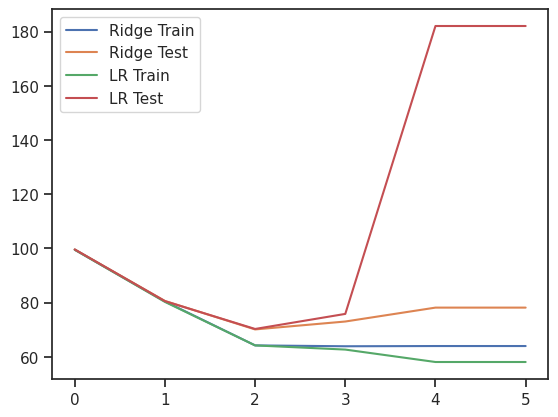

In [54]:
X_poly = np.c_[X, X[:,:6]**2, X[:,:6]**3, X[:,:6]**4, X[:,:6]**5, X[:,:6]**6]

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_poly)
X_scale = scaler.transform(X_poly)

from collections import defaultdict

history = defaultdict(list)

for n in range(1,7):
    X_sub = X_scale[:,0:n*8]
    X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.50, random_state=2020)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred))
    y_pred = reg.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))
    history['lr-train'].append(RMSE_train)
    history['lr-test'].append(RMSE_test)
    
    ridge = RidgeCV(alphas=[0.00001, 0.0001, 0.001, 0.003, 0.007, 0.01, 0.05, 0.07], cv=5).fit(X_train, y_train)
    modele_final = Ridge(alpha=ridge.alpha_, max_iter=100000).fit(X_train, y_train)
    y_pred = modele_final.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred))
    y_pred = modele_final.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))
    history['ridge-train'].append(RMSE_train)
    history['ridge-test'].append(RMSE_test)
    
import matplotlib.pyplot as plt
plt.plot(history['ridge-train'], label="Ridge Train")
plt.plot(history['ridge-test'], label="Ridge Test")
plt.plot(history['lr-train'], label="LR Train")
plt.plot(history['lr-test'], label="LR Test")
plt.legend()